

<strong>Kaan Korkmaz</strong>   
<strong>Luana Peixoto</strong>  
<strong>Ulf Kavlie</strong>   
<br><br>
<div align="center"><strong><h1>Data Analysis Team Project</h1><strong><div align="center"/>
<br><br>



<br>

# Introduction     

<br>
South America is the fourth largest continent in the world, composed of a total of 12 developing countries. In the 15th century, the continent was colonized mainly by the Spanish and Portuguese, which explains why those are the dominant languages of the region. Nevertheless, South America is exceptionally diverse linguistically with 448 spoken languages. This area is known for some incredible wonders of nature like the Amazon Rainforest, the Atacama Desert, Angel Falls, and the Andes Mountain. 

Most South American countries are heavily dependent on the export of their natural resources that can include iron, petroleum, and agricultural produce like corn, coffee, and wheat. Another interesting fact about South Americans is that they are, in its majority, Catholics, which is another factor influenced by their colonizers. In this assignment, we utilized a dataset acquired from the World Bank to conduct an exploratory data analysis of this fascinating region.



<br><br>
<div style = "width:image width px; font-size:80%; text-align:center;"><img src=./Images/South_America_Map.jpg width="300" height="350" style="padding-bottom:0.5em;"> <em>Figure 1: Map of South America</em></div>
<br><br>

In [1]:
## IMPORTING PACKAGES AND CREATING DATAFRAMES 

# importing packages
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# specifying a file
file = "./Final_Project_Dataset.xlsx"

# reading the file 
countries = pd.read_excel(io          = file,
                          sheet_name  = 'Data',
                          header      = 0).copy()

In [2]:
## ADDING THE FOUND VALUES

countries.iloc[34,4]       = 1000
countries.iloc[159,4]      = 580
countries.iloc[205,4]      = 3500

countries.iloc[55,5]       = 97.5804

countries.iloc[205,7]      = 40

countries.iloc[178,8]      = 80
countries.iloc[205,8]      = 96.2

countries.iloc[45,9]       = 33.76146157

countries.iloc[45,16]      = 471.5791055
countries.iloc[80,16]      = 103.6965679

countries.iloc[45,19]      = 2.12053500318397
countries.iloc[80,19]      = 9.643520707

countries.iloc[45,19]      = 19610

countries.iloc[45,24]      = 6.4

countries.iloc[34,25]      = 5.8
countries.iloc[80,25]      = 4.5
countries.iloc[205,25]     = 3.2

countries.iloc[7,28]       = 99.0038681030273
countries.iloc[55,28]      = 92.82978821
countries.iloc[80,28]      = 85.63973236
countries.iloc[151,28]     = 94.40827179
countries.iloc[205,28]     = 97.12709045

countries.iloc[45,30]      = 114.5239383

countries.iloc[7,34]       = 35.5
countries.iloc[34,34]      = 8.6
countries.iloc[40,34]      = 27
countries.iloc[159,34]     = 24.2
countries.iloc[205,34]     = 33.1

countries.iloc[7,35]       = 98.1
countries.iloc[26,35]      = 97.2
countries.iloc[34,35]      = 95
countries.iloc[40,35]      = 97.2
countries.iloc[55,35]      = 84.2
countries.iloc[80,35]      = 90.7
countries.iloc[151,35]     = 97
countries.iloc[178,35]     = 90.9
countries.iloc[201,35]     = 97.2
countries.iloc[205,35]     = 97.5

countries.iloc[205,36]     = 0.6

countries.iloc[25,38]      = 94.83978271
countries.iloc[26,38]      = 100.6846466
countries.iloc[34,38]      = 96.24210358

countries.iloc[55,41]      = 90.94167

countries.iloc[45,43]      = 157.5701116

In [3]:
# Getting the index number of world data
WLD = countries[countries.iloc[:,0]== 'WLD'].index[0]
  
# Dropping the world line
countries = countries.drop(WLD)
countries = countries.reset_index(drop=True)

# South America dataframe
samerica = countries.loc[:,:][countries.loc[: , "Cool Name"] == 'Ironhide'].copy()

In [4]:
## COUNTRY MULTIPLIER 

# Multiplier list
pop_prc = []

# Getting 3 clumns for easier calculation 
country_multiplier = countries.loc[:,["Country Code Total", "Population, total"]]

# Getting total Population
tot_pop = country_multiplier.iloc[:,1].sum()

# Creating the multiplier list 
i = 0
for ctr in country_multiplier.iloc[:, 0]:
    per = country_multiplier.iloc[i, 1] / tot_pop * 100
    #pop_prc.append([country_multiplier.iloc[i, 0], per])
    pop_prc.append(per)
    i+=1

# Creating the normalized dataframe
countries_norm = countries.copy()

# creating multiplied world data
j = 0
for row in countries_norm.iloc[:, 0]:
    countries_norm.iloc[j,4:] = countries_norm.iloc[j,4:] * pop_prc[j]
    j+=1

# Except Population
countries_norm.loc[:, "Population, total"] = countries.loc[:, "Population, total"].copy()

# creating multiplied South America data   
samerica_norm = countries_norm.loc[:,:][countries_norm.loc[: , "Cool Name"] == 'Ironhide'].copy()


Argentina count is:  4
Uruguay count is:    3
Peru count is:       4
Brazil count is:     13
Guyana count is:     2
Colombia count is:   4
Chile count is:      2
Bolivia count is:    1
Venezuela count is:  2
Paraguay count is:   3
Suriname count is:   2
Curaçao count is:    0
Ecuador count is:    1



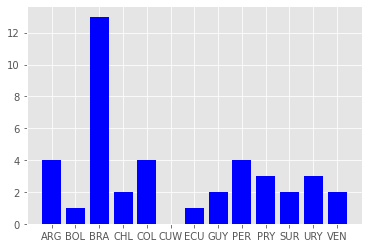

In [5]:
## FINDING REPRESENTATIVE COUNTRY IN REGION

lst = []

# Finding average for each column
c = 4
for col in samerica_norm.iloc[0, c:]:
    sum_of = samerica_norm.iloc[:,c].sum()
    
    # Finding the average value for samerica columns
    a = samerica_norm.iloc[:,c][samerica_norm.iloc[:,c].notnull()==True].count()-1
    v = 0
    while a >= 0:
        v += pop_prc[samerica_norm.iloc[:,c][samerica_norm.iloc[:,c].notnull()==True].index[a]]
        a-=1    
    value_count = v
    avg = sum_of / value_count

    # Finding the closest country to the average and incrementinge
    b = 0
    diff_c = float('inf') 
    min_country = " "
    for row in samerica.iloc[:, 0]:
        diff = abs(avg - samerica.iloc[b, c])
        
        if diff_c > diff:
            diff_c = diff
            min_country = samerica_norm.iloc[b, 0]
            min_country_val = samerica_norm.iloc[b, c]
            
        b += 1
    lst.append(min_country)
    c += 1

# Printing the result
print(f"""
Argentina count is:  {lst.count('ARG')}
Uruguay count is:    {lst.count('URY')}
Peru count is:       {lst.count('PER')}
Brazil count is:     {lst.count('BRA')}
Guyana count is:     {lst.count('GUY')}
Colombia count is:   {lst.count('COL')}
Chile count is:      {lst.count('CHL')}
Bolivia count is:    {lst.count('BOL')}
Venezuela count is:  {lst.count('VEN')}
Paraguay count is:   {lst.count('PRY')}
Suriname count is:   {lst.count('SUR')}
Curaçao count is:    {lst.count('CUW')}
Ecuador count is:    {lst.count('ECU')}
""")

# Lists for country names and values
list_n = []
list_v = []
i=0
for n in samerica_norm.iloc[:, 0]:
    list_n.append(n)
for n in samerica_norm.iloc[:, 0]:
    list_v.append(lst.count(n))

# Plotting
plt.style.use('ggplot')
plt.bar(list_n, list_v, color='blue')
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.show()

# The South American Countries 

<br>
To begin our exploratory data analysis and better understand the South American region we utilized the Python
codes shown above. Our main objective in this step of the analysis was to select the country that would best represent the region.

To achieve that we first designed a code to create a multiplier for each country based on their respective populations, so that the data could be analyzed more precisely. Subsequently, the next code was designed utilizing for and while loops to calculate the South American weighted average for each feature (i.e. column). Finally, the code compares each country's values (i.e. rows) with the averages that were just found and selects the value that is closer to that average.

What the output of the code reveals is that Bolivia is the country with fewer values closer to the region's average (1 value) and Brazil is the country with more values close to the region's average (12 values), and that is why we selected <strong>Brazil</strong> as the best country to represent South America.

It is also interesting to highlight the country of Curaçao for this analysis, which had 0 values close to the region's average. Curaçao is a small island that is a constituent country of the Netherlands and therefore has very little data available. Additionally, the country is usually classified as part of the Caribbean and not the South American region.
<br><br><br>

<br><br><br><br><br><br>
<div style = "width:image width px; font-size:80%; text-align:center;"><img src=./Images/Flag_of_Brazil.svg.png width="300" height="350" style="padding-bottom:0.5em;"> <em>Figure 2: Flag of Brasil</em></div>
<br><br>

<br>
<div style = "width:image width px; font-size:80%; text-align:center;"><img src=./Images/Location_Curacao.svg width="300" height="350" style="padding-bottom:0.5em;"> <em>Figure 3: Location of Curacao</em></div>
<br><br>

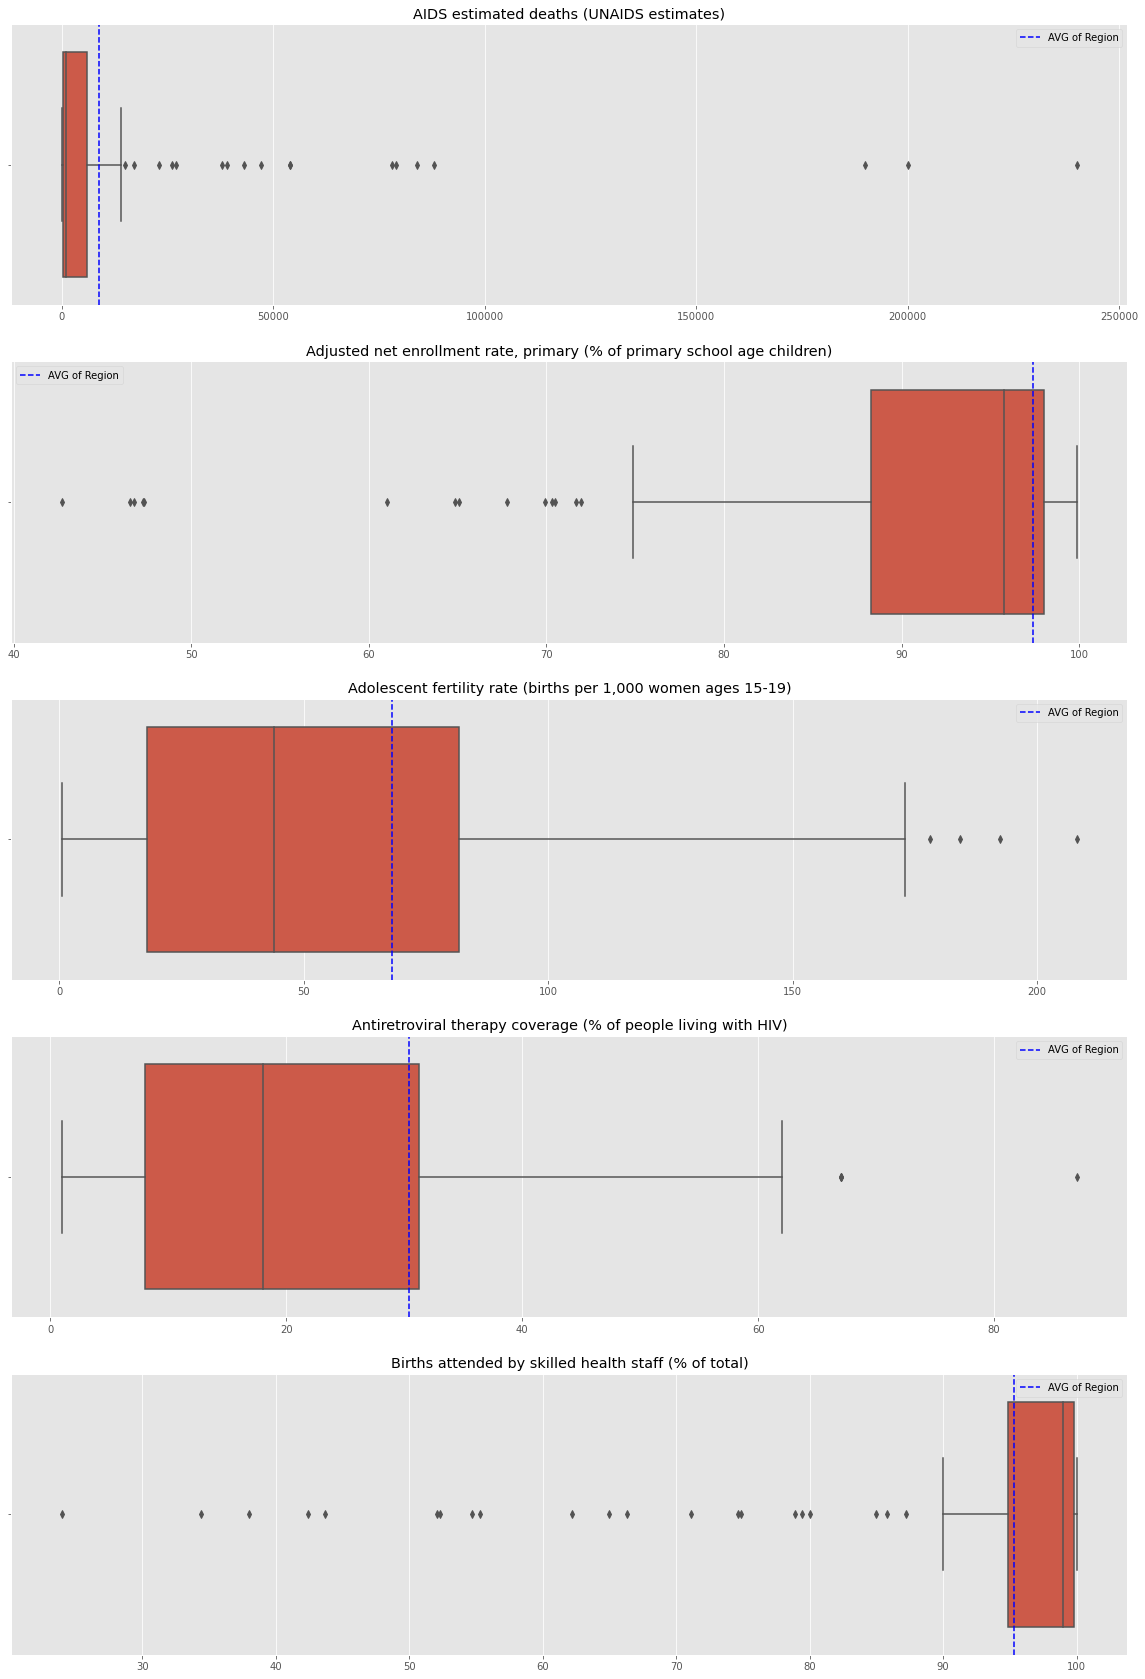

In [6]:
## COMPARED TO WORLD

lst_data    = []
lst_smol    = []
lst_name    = []
lst_avg_sa  = []

# Comparison of Samerica and the World
c = 4
for col in samerica.iloc[0, c:]:
    
    #max and min values of world data for percentage calculation
    max_w = countries.iloc[:,c].max()
    min_w = countries.iloc[:,c].min()
    max_min = max_w - min_w

    # Average of Samerica
    sum_of_sa = samerica_norm.iloc[:,c].sum()    
    a = samerica_norm.iloc[:,c][samerica_norm.iloc[:,c].notnull()==True].count()-1
    v = 0
    while a >= 0:
        v += pop_prc[samerica_norm.iloc[:,c][samerica_norm.iloc[:,c].notnull()==True].index[a]]
        a-=1    
    value_count_sa = v   
    avg_sa = sum_of_sa / value_count_sa
    lst_avg_sa.append(avg_sa)
    
    # Average of World
    sum_of_w = countries_norm.iloc[:,c].sum()
    a = countries_norm.iloc[:,c][countries_norm.iloc[:,c].notnull()==True].count()-1 
    v = 0
    while a >= 0:
        v += pop_prc[countries_norm.iloc[:,c][countries_norm.iloc[:,c].notnull()==True].index[a]]
        a-=1    
    value_count_w = v   
    avg_w = sum_of_w / value_count_w   

    # difference between samerica and world
    diff_sa_w = abs(avg_w - avg_sa) 
    
    # difference percentage between samerica and world
    diff_percentage = diff_sa_w / max_min * 100
    
    # appending to lists
    lst_data.append([samerica.columns[c],avg_w, avg_sa, diff_sa_w, diff_percentage])    
    lst_smol.append([samerica.columns[c], round(diff_percentage,2)])
    lst_name.append(samerica.columns[c])
    c += 1  

# sorting the data
lst_data.sort(key=lambda x: x[3], reverse = True)
lst_smol.sort(key=lambda x: x[1], reverse = True)

# # printing the result
# i = 5
# for p in lst_name:
#     print(p)
#     i-=1
#     if i == 0:
#         break
        
# Plotting
fig, ax = plt.subplots(figsize = (20, 30))
i = 0
while i < 5:
    plt.subplot(5, 1, i+1) 
    sns.boxplot(x      = lst_name[i],  # x-variable
                y      = None,         # optional y-variable
                hue    = None,         # optional categorical feature
                orient = 'h',          # horizontal or vertical
                data   = countries)    # DataFrame where features exist

    # formatting and displaying the plot
    plt.title(label = lst_name[i])
    plt.axvline(x= lst_avg_sa[i], c='blue', linestyle='dashed', label='AVG of Region')
    plt.xlabel(xlabel = '')
    plt.legend()
    i+=1

plt.show()        

# What makes South America unique?

<br>
The next step in our analysis was to take a closer look into the features and understand what they can tell us about how South America is different from the other regions of the world, what makes it unique. 

With the code above we were able to compare and contrast the weighted average of South America with the average of the world for each feature in percentages and the output created a visual representation for the 5 features in which the values for South America are further from the values of the world. The boxplots depict the minimum and maximum value, the median, the interquartile range, and outliers for each feature and the dashed blue line depicts the South American average.

What we can conclude from this analysis about those 5 features is:

 - The <strong>AIDS estimated deaths (UNAIDS estimate)</strong> feature is the index that is furthest away from the world average. What the analysis demonstrates is that the estimated number of deaths related to AIDS in South America is considerably larger than the average for the estimated number of deaths related to AIDS in the world.
 <br><br>
 - The <strong>adjusted net enrollment rate, primary (% of primary school age children)</strong> feature is the second furthest from the world average. For this feature, what we can conclude is that, in South America, the average of primary school age children that are enrolled in school is greater than the average of primary school age children that are enrolled in school in the world.
 <br><br>
 - The <strong>adolescent fertility rate (births per 1,000 women ages 15-19)</strong> is the third furthest from the world average. This indicates that the average fertility rate between adolescents in South America is higher than the world average for this feature.
 <br><br>
 - The <strong>antiretroviral therapy coverage (% of people living with HIV)</strong> is the fourth furthest from the world average. What this analysis infers for this feature is that the average of people living with HIV and receiving antiretroviral therapy in South America is larger than the average of people living with HIV and receiving antiretroviral therapy around the world.
 <br><br>
 - Finally, the <strong>births attended by skilled health staff (% of total)</strong> is the fifth furthest from the world average. The finding for this feature is that the average of births that are attended by skilled health staff concerning the total numbers of birth in South America is smaller than the average of births that are attended by skilled health staff concerning the total numbers of birth in the world. 
<br><br><br>

# What is the strategy for missing values and outliers? 

<br>
To audit the data quality of this dataset we focused on the detection and treatment of the following anomalies: <strong>missing values</strong> and <strong>outliers</strong>.

We started by designing a code to detect and flag any <strong>missing values</strong> in the South American data, which led us to find 77 anomalies in this category (36 from Curacao and 41 from the other countries combined). Subsequently, we designed a code that would help us to apply a distinct missing value strategy for each feature. To do that, the code would allow the option of imputing the real data (found by us through the World Bank website or the UNAIDS website), input with the mean, or input with the median. To ensure that we would always be utilizing the approach that would least distort our data we started by imputing with the data we found. When the numbers were not available, we would then proceed to analyze it with the visualization, that would help us decide between imputing with the mean or median. From those inputs, we created a new dataset with no more anomalies of the missing value category. 

For the <strong>outliers</strong> we also designed a code to detect, flag and display those anomalies. For each feature, the code computes median and interquartile range to understand what is the outlier threshold for that specific feature and then compares the value of that index to the results found before, identifying if the feature value is an outlier or not. The output displayed a total of 30 outliers for the data of South America, with Bolivia and Guyana as the main contributors.
<br><br>

In [ ]:
#IMPORTING THE DATASET

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file="./Final_Project_Dataset.xlsx"

data=pd.read_excel(io=file,
                 header=0)

group_data=data.loc[ : , : ][data.loc[ : ,"Cool Name"]=="Ironhide"].copy()

#calculates number of columns in the original dataset used later
col1=0
for i in group_data.columns:
    col1+=1

## Flag all missing values


In [ ]:
#FLAGGING MISSING VALUES

for col in group_data:
    if group_data[col].isnull().astype(int).sum()>0:
        group_data["m_"+col]=group_data[col].isnull().astype(int)
#again calculating number of columns        
col2=0
for i in group_data.columns:
    col2+=1
#diff will make it easier to summerize
diff=col1-col2

### Summarize the missing values 

In [ ]:
#SUMMURIZING MISSING VALUES INTO ONE COLUMN

group_data["mv_sum"]=group_data.iloc[:,diff: ][group_data.iloc[:,diff:]==0].isnull().sum(axis=1)

col3=0
for i in group_data.columns:
    col3+=1
    
group_data.loc[:,["Country Name","mv_sum"]]

### Imputing missing values

This was done with code 4.1.1 during our project, the code then gave us an imputing log, which is now used in code 4.1.2 to save time for the reader

In [ ]:
#### CODE 5.1

#creating a log of every imputing that can be looked at later
#imputing_log=[]
#filtering on null-values
#for col in group_data:
#    if group_data[col].isnull().astype(int).sum()>0 :
#        x=group_data[col].isnull().astype(int).sum()
#        miss_count=group_data.loc[:,"Country Name"][group_data.loc[:,col].isnull()]
#        
#        #making a list of countries with missing values for each category
#        country_lst=[]
#        y=len(miss_count)
#        while y>0:
#            country_lst.append(miss_count.iloc[y-1])
#            y-=1
# This part is to give the user a sense of the data and decide value
#        print(f"""
#For the column {col} we have {x} missing values
#Countries missing values are:
#""")
#        for name in country_lst:
#            print(name)
#        print(f"""
#This is the distribution of values""")
#        fig,ax=plt.subplots(figsize=[8,5])
#        
#        sns.distplot(a=group_data[col],
#                    hist = True,
#                    bins = "fd",
#                    kde = False,
#                    rug = False,
#                    color = "black")
#        plt.axvline(x=group_data[col].mean(),
#                   color="blue")
#        plt.axvline(x=group_data[col].median(),
#                   color="red")
#        
#        plt.legend(labels=["Mean","Median"])
#        
#        plt.tight_layout()
#        plt.show()
#
#        for country in country_lst:
#            
#            method=input(prompt=f"""
#What would you like to do with {country}
#
#1) Mean
#2) Median
#3) Insert own value
#""")
# after considering data, user inputs chosen data            
            
            #try/except to make it possible to insert both numeric data and string in form of mean/median
#            try: 
#                method=float(method)
#                #appends every insert to a list, so that it is possible to look over list after
#                imputing_log.append(method)
#                country_condition=group_data.loc[:, "Country Name"]==country
#                x=group_data[col][country_condition]
#                
#                group_data.loc[:,col].replace(to_replace=x,
#                                   value=method,
#                                 inplace=True)
#            except:
#                imputing_log.append(method)
#                if "mean" in method:
#                    mean=round(group_data[col].mean(),ndigits=2)
#                    country_condition=group_data.loc[:, "Country Name"]==country
#                    x=group_data[col][country_condition]
#                    
#                    group_data.loc[:,col].replace(to_replace=x,
#                                       value=mean,
#                                     inplace=True)
#                elif "median" in method:
#                    median=round(group_data[col].median(),ndigits=2)
#                    country_condition=group_data.loc[:, "Country Name"]==country
#                    x=group_data[col][country_condition]
#                    
#                    group_data.loc[:,col].replace(to_replace=x,
#                                       value=median,
#                                     inplace=True)



In [ ]:
#CODE 5.2



#index for the list later in code
index=0
#filtering on null-values
for col in group_data:
    if group_data[col].isnull().astype(int).sum()>0 :
        x=group_data[col].isnull().astype(int).sum()
        miss_count=group_data.loc[:,"Country Name"][group_data.loc[:,col].isnull()]
        #creating a list of country names with null-values within a category
        country_lst=[]
        y=len(miss_count)
        while y>0:
            country_lst.append(miss_count.iloc[y-1])
            y-=1


        for country in country_lst:
            #imputing log from previous code
            imputing_log=[3500, 580, "median", 1000, 97.58, "mean",40, "median", 96.2, 80,
                    "median", 33.76, "mean", "mean", "mean", "median", "mean", "mean",
                    103.69, "median", "mean", 9.64, 2.12, 19610, "mean", "median",
                    "mean", 6.4, 3.2, "median", 4.5, "median", 5.8, "mean", 97.12,
                    94.4, 85.63, 92.82, "median", 99, "mean", 114.52, "mean",
                    "median", 33.1, "mean", 24.2, "mean", "mean", 27, 8.6, "mean",
                    35.5, 97.5, 97.2, 90.9, 97, 90.7, 84.2, "mean", 97.2, 95,
                    97.2, 98.1, 0.6,"median", "mean", 104.43, "mean", 96.24, 100.68,
                    94.83, "mean", "mean", "mean", "mean", 90.94,
                    "median", "mean", 157.57, "mean"]
            #indexing on list rather than iinput
            method=imputing_log[index]
            #try/except to make it possible to insert both numeric data and string in form of mean/median
            try: 
                method=float(method)

                country_condition=group_data.loc[:, "Country Name"]==country
                x=group_data[col][country_condition]

                group_data.loc[:,col].replace(to_replace=x,
                                   value=method,
                                 inplace=True)
                index+=1
            except:

                #code for imputing with mean if thats the desirable output
                if "mean" in method:
                    #creating mean
                    mean=round(group_data[col].mean(),ndigits=2)
                    #conditioning around country
                    country_condition=group_data.loc[:, "Country Name"]==country
                    #subsetting on conditions
                    x=group_data[col][country_condition]
                    #imputing the correct value
                    group_data.loc[:,col].replace(to_replace=x,
                                       value=mean,
                                     inplace=True)
                    index+=1
                #code for imputing with median if thats the desirable output
                elif "median" in method:
                    #creating median
                    median=round(group_data[col].median(),ndigits=2)
                    #conditioning around country
                    country_condition=group_data.loc[:, "Country Name"]==country
                    #subsetting on conditions
                    x=group_data[col][country_condition]
                    #imputing the correct value
                    group_data.loc[:,col].replace(to_replace=x,
                                       value=median,
                                     inplace=True)
                    index+=1
                else:
                    #else condition to make the code not break
                    index+=1
                    continue

## Flagging outliers

### Flagging of upper values

In [ ]:
#FLAGGING OUTLIERS VALUES
outlier_lst=[]
for col in group_data.iloc[:,4:col1]:
    #Calculating median and IQR
    col_med=group_data[col].median()
    low_q=group_data[col].quantile(.25)
    high_q=group_data[col].quantile(.75)
    #Creating upper and lower limit for boxplot
    upper_hinge=round(((high_q-low_q)*1.5+high_q),ndigits=2)
    lower_hinge=round((low_q-(high_q-low_q)*1.5),ndigits=2)
    #condition around limits and category  
    upper_condition=group_data.loc[:,col]>upper_hinge
    lower_condition=group_data.loc[:,col]<lower_hinge

    for row in group_data[col]:

        if row>upper_hinge:
            #creating list which then can be used for visualizing etc.
            outlier_lst.append(col)
            #Creating new column for flagg
            group_data["out_up_"+col]=0
            #Subsetting on condition
            x=group_data.iloc[:,-1][upper_condition]
            group_data.iloc[:,-1].replace(to_replace=x,
                                          value=1,
                                          inplace=True)

### Flagging of lower values

In [ ]:
#Same as previous but with lower condition

for col in group_data.iloc[:,4:col1]:
    col_med=group_data[col].median()
    low_q=group_data[col].quantile(.25)
    high_q=group_data[col].quantile(.75)
    
    upper_hinge=round(((high_q-low_q)*1.5+high_q),ndigits=2)
    lower_hinge=round((low_q-(high_q-low_q)*1.5),ndigits=2)
       
    upper_condition=group_data.loc[:,col]>upper_hinge
    lower_condition=group_data.loc[:,col]<lower_hinge

    for row in group_data[col]:
        if row<lower_hinge:
            outlier_lst.append(col)
            group_data["out_low_"+col]=0
            x=group_data.iloc[:,-1][lower_condition]
            group_data.iloc[:,-1].replace(to_replace=x,
                                          value=1,
                                          inplace=True)

### Outlier visualisation
The two previous codes gave us an outlier list, which then can be used to visualize the outliers that are in the dataset

In [ ]:

#Filtering out duplicates
outlier_lst=list(set(outlier_lst))

x=1

for out in outlier_lst:
    fig,ax=plt.subplots(figsize=[10,20])
    plt.subplot(len(outlier_lst),1,x)
    
    sns.boxplot(x=out,
               y=None,
               hue=None,
               orient="h",
               data=group_data)
    plt.show()

    x+=1

### Summarizing of outliers

In [ ]:
#SUMMURIZING OUTLIERS
col4=0
for i in group_data.columns:
    col4+=1
diff=col3-col4
group_data["out_sum"]=group_data.iloc[:,diff: ][group_data.iloc[:,diff:]==0].isnull().sum(axis=1)


### Showing the anomalies 

In [ ]:
#SHOWING ANOMALIES

anomaly_data=group_data.loc[:,["Country Name","mv_sum","out_sum"]]

anomaly_data

# Sources

### https://www.unaids.org/sites/default/files/media_asset/2020_aids-data-book_en.pdf
### https://data.worldbank.org/indicator/SE.PRM.TENR
### https://data.worldbank.org/indicator/SH.HIV.ARTC.ZS
### https://data.worldbank.org/indicator/SH.STA.BRTC.ZS
### https://data.worldbank.org/indicator/EN.ATM.CO2E.PC
### https://data.worldbank.org/indicator/EG.USE.COMM.GD.PP.KD
### https://data.worldbank.org/indicator/EG.GDP.PUSE.KO.PP.KD
### https://data.worldbank.org/indicator/NY.GNP.PCAP.CD
### https://data.worldbank.org/indicator/SH.TBS.INCD
### https://data.worldbank.org/indicator/SI.DST.FRST.20
### https://data.worldbank.org/indicator/SE.ADT.LITR.ZS
### https://data.worldbank.org/indicator/IT.CEL.SETS.P2
### https://data.worldbank.org/indicator/SI.POV.NAHC
### https://data.worldbank.org/indicator/SH.STA.ANVC.ZS
### https://data.worldbank.org/indicator/SH.DYN.AIDS.ZS
### https://data.worldbank.org/indicator/SE.PRM.CMPT.ZS
### https://data.worldbank.org/indicator/SE.PRM.NENR
### https://data.worldbank.org/indicator/NE.TRD.GNFS.ZS

